# TMDB Project Part 4

## Hypthesis Testing

Part 4
For part 4 of the project, you will be using your MySQL database from part 3 to answer meaningful questions for your stakeholder. They want you to use your hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie.
- Questions to Answer
1. The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- They want you to perform a statistical test to get a mathematically-supported answer.
- They want you to report if you found a significant difference between ratings.
- If so, what was the p-value of your analysis?
- And which rating earns the most revenue?
- They want you to prepare a visualization that supports your finding.
2. It is then up to you to think of 2 additional hypotheses to test that your stakeholder may want to know.

Some example hypotheses you could test:

- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
- Do movies released in 2020 earn less revenue than movies released in 2018?
- How do the years compare for movie ratings?
- Do some movie genres earn more revenue than others?
- Are some genres higher rated than others?
- etc.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
## fixing random for lesson generation
np.random.seed(42)

## Standard Statsmodels import
import statsmodels.api as sm

#evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

### Upload Data

In [2]:
#Import data and display first 5 rows
filename = 'Data/FINAL_COMBINED_MOVIES.csv.gz'
df = pd.read_csv(filename)
df.head()#Import data and display first 5 rows

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.115,2194.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.800,49.0,R


### Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62771 entries, 0 to 62770
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                62771 non-null  object 
 1   adult                  62771 non-null  float64
 2   backdrop_path          40488 non-null  object 
 3   belongs_to_collection  4207 non-null   object 
 4   budget                 62771 non-null  float64
 5   genres                 62771 non-null  object 
 6   homepage               15081 non-null  object 
 7   id                     62771 non-null  float64
 8   original_language      62771 non-null  object 
 9   original_title         62771 non-null  object 
 10  overview               61436 non-null  object 
 11  popularity             62771 non-null  float64
 12  poster_path            57870 non-null  object 
 13  production_companies   62771 non-null  object 
 14  production_countries   62771 non-null  object 
 15  re

In [4]:
#dropping columns we don't need
col_to_drop = ['backdrop_path','original_title','overview','poster_path','status','tagline','original_language',
              'id','homepage','video','production_companies','production_countries','spoken_languages']
df.drop(columns=col_to_drop,inplace=True)
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.804,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.665,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN


In [5]:
#belong to collection
df['belongs_to_collection'].notna().sum()

4207

In [6]:
#use .notna() to get True if it belongs to a collection
df['belongs_to_collection']= df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    58564
True      4207
Name: belongs_to_collection, dtype: int64

In [7]:
#genre
#slicing out one
df['genres'][0]

"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]"

In [8]:
#functin to get genre names as a list
def get_genre_name(x):
    #replace single quotes to double
    x=x.replace("'",'"')
    x=json.loads(x)
    
    genres=[]
    for genre in x:
        genres.append(genre['name'])
    return genres

In [9]:
#use function and explode new columns
#testing to see if function works
get_genre_name(df.loc[0,'genres'])

['Comedy', 'Music', 'Romance']

In [10]:
#use function for entire genres column and saving results as new column
df['genres_list']= df['genres'].apply(get_genre_name)
#using explode
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.804,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.804,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.804,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.665,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.924,2000-04-14,0.0,152.0,Gang,4.0,1.0,NaN,Drama


In [11]:
#save unique Genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [12]:
#manually OneHotEncode genres
for genre in unique_genres:
    df[f'Genre_{genre}'] = df['genres'].str.contains(genre,regex=False)
df.head(3)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.804,2000-09-22,0.0,86.0,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.665,2000-11-15,0.0,100.0,For the Cause,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.924,2000-04-14,0.0,152.0,Gang,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#drop original genre columns
df = df.drop(columns=['genres','genres_list'])
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,2.804,2000-09-22,0.0,86.0,The Fantasticks,5.5,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,2.665,2000-11-15,0.0,100.0,For the Cause,5.1,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#checking certification value counts
df['certification'].value_counts(dropna=False)

NaN                                47600
R                                   6243
NR                                  3539
PG-13                               3286
PG                                  1470
G                                    453
NC-17                                170
Unrated                                5
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [15]:
#fix extra space certs
df['certification'] = df['certification'].str.strip()

In [16]:
#fix certification columns
#creating dictionary
repl_cert ={'UR': 'NR','Not Rated':'NR','Unrated':'NR','-':'NR','10':np.nan,
           'ScreamFest Horror Film Festival':'NR'}
df['certification']=df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      47601
R         6243
NR        3547
PG-13     3287
PG        1470
G          453
NC-17      170
Name: certification, dtype: int64

In [17]:
#converting years to seperate features
df['release_date'].value_counts()

2009-01-01    267
2010-01-01    235
2008-01-01    228
2011-01-01    197
2012-01-01    177
             ... 
2008-12-14      1
2003-02-25      1
2019-02-25      1
2008-01-06      1
2022-06-28      1
Name: release_date, Length: 7810, dtype: int64

In [18]:
new_cols =['year','month','day']
df[new_cols]=df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,2.804,2000-09-22,0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,2.665,2000-11-15,0.0,100.0,For the Cause,5.100,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.924,2000-04-14,0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,24.017,2000-09-29,12854953.0,99.0,In the Mood for Love,8.115,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,5.303,2000-09-02,0.0,99.0,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62766,tt9895024,0.0,False,0.0,1.330,2021-09-08,0.0,118.0,Heiko's World,5.800,...,False,False,False,False,False,False,False,2021.0,9.0,8.0
62767,tt9896876,0.0,False,0.0,2.116,2021-11-19,0.0,101.0,India Sweets and Spices,5.625,...,False,False,False,False,False,False,False,2021.0,11.0,19.0
62768,tt9898844,0.0,False,0.0,19.278,2022-01-21,0.0,91.0,The Hunting,4.800,...,False,False,False,False,False,False,False,2022.0,1.0,21.0
62769,tt9900940,0.0,False,0.0,2.371,2021-12-07,0.0,87.0,The Scrapper,6.000,...,False,False,False,False,False,False,False,2021.0,12.0,7.0


In [19]:
#drop original date column
df = df.drop(columns='release_date')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62771 entries, 0 to 62770
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                62771 non-null  object 
 1   adult                  62771 non-null  float64
 2   belongs_to_collection  62771 non-null  bool   
 3   budget                 62771 non-null  float64
 4   popularity             62771 non-null  float64
 5   revenue                62771 non-null  float64
 6   runtime                62771 non-null  float64
 7   title                  62771 non-null  object 
 8   vote_average           62771 non-null  float64
 9   vote_count             62771 non-null  float64
 10  certification          15170 non-null  object 
 11  Genre_Comedy           62771 non-null  bool   
 12  Genre_Music            62771 non-null  bool   
 13  Genre_Romance          62771 non-null  bool   
 14  Genre_Science Fiction  62771 non-null  bool   
 15  Ge

In [21]:
#replacing missing values with a constant
df['certification'].fillna(value = 'Unknown', inplace = True)

In [22]:
#drops ALL rows with missing values
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61820 entries, 0 to 62770
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                61820 non-null  object 
 1   adult                  61820 non-null  float64
 2   belongs_to_collection  61820 non-null  bool   
 3   budget                 61820 non-null  float64
 4   popularity             61820 non-null  float64
 5   revenue                61820 non-null  float64
 6   runtime                61820 non-null  float64
 7   title                  61820 non-null  object 
 8   vote_average           61820 non-null  float64
 9   vote_count             61820 non-null  float64
 10  certification          61820 non-null  object 
 11  Genre_Comedy           61820 non-null  bool   
 12  Genre_Music            61820 non-null  bool   
 13  Genre_Romance          61820 non-null  bool   
 14  Genre_Science Fiction  61820 non-null  bool   
 15  Ge

### State the Hypothesis & Null Hypothesis

- $H_0$ Null Hypothesis: The MPAA ratings have no significant impact on the revenue generated by a movie.

-  $H_1$ Alternate hypothesis: The  MPAA ratings impact the revenue generated by a movie.

- Alpha Level - We are using an alpha level of 0.05.

- Test of Choice: One Way ANOVA and/or Tukey

### Test of Choice
We will be using a Independent T-Test since we are comparing numeric data (sales) for 2-samples (discount vs no discount).
- Assumptions to Meet
  - No significant outliers
  - Normality
  - Equal Variance

In [24]:
df['certification'].value_counts()

Unknown    46650
R           6243
NR          3547
PG-13       3287
PG          1470
G            453
NC-17        170
Name: certification, dtype: int64

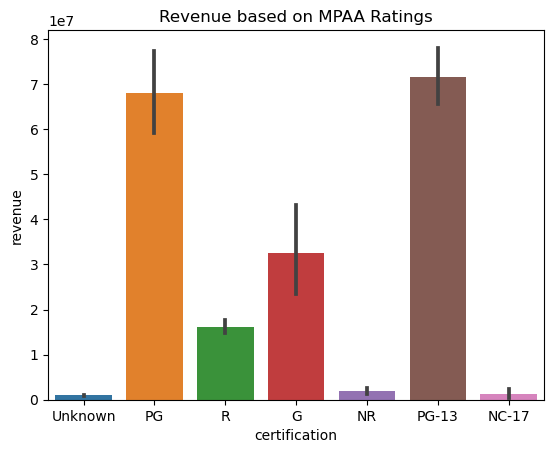

In [25]:
#visualization
ax = sns.barplot(data=df, x='certification',y='revenue')
ax.set_title("Revenue based on MPAA Ratings");

Our graph above shows that PG-13 movies earn the most revenue compared to all the other MPAA ratings.

In [26]:
## Create groups dictionary
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['Unknown', 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

### Checking for Normality

In [27]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
Unknown,46650.0,0.000000e+00,134254.468389
PG,1470.0,6.930316e-278,1276.365501
R,6243.0,0.000000e+00,7945.986222
G,453.0,2.407908e-118,541.652565
NR,3547.0,0.000000e+00,7699.147548
PG-13,3287.0,0.000000e+00,3662.024587
NC-17,170.0,8.059389e-60,272.136536


In [28]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
Unknown,46650.0,0.000000e+00,134254.468389,True
PG,1470.0,6.930316e-278,1276.365501,True
R,6243.0,0.000000e+00,7945.986222,True
G,453.0,2.407908e-118,541.652565,True
NR,3547.0,0.000000e+00,7699.147548,True
PG-13,3287.0,0.000000e+00,3662.024587,True
NC-17,170.0,8.059389e-60,272.136536,True


- We DID NOT meet the assumption of normality but as long as our population is large enough (in this case, between 2-9 groups and each group n >= 15), we can take advantage of tests that assume a normal distribution.

### Checking for Equal Variance

In [29]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=1091.7056954215598, pvalue=0.0)

- We DID NOT meet the assumption of equal variance and will therefore need to use the nonparametric test:Kruskal-Wallis.

In [30]:
#kruskal test
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=13087.729380303801, pvalue=0.0)

### Conclusion

Our p value is less than 0.05 which means that we reject the null hypothesis and support that the MPAA ratings do impact the revenue generated by a movie. We will use a Tukey test to see which groups impact the revenue. 

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels as certication categories
values = df['revenue']
labels = df['certification']

In [32]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-31357959.031,0.0,-46617694.3175,-16098223.7444,True
G,NR,-30653581.2444,0.0,-39118578.8321,-22188583.6566,True
G,PG,35439092.7971,0.0,26321957.2422,44556228.352,True
G,PG-13,38988433.4439,0.0,30485605.5946,47491261.2932,True
G,R,-16409483.5328,0.0,-24664890.5897,-8154076.4759,True
G,Unknown,-31543541.4945,0.0,-39553419.4219,-23533663.5671,True
NC-17,NR,704377.7866,1.0,-12616037.4685,14024793.0416,False
NC-17,PG,66797051.8281,0.0,53052982.5932,80541121.063,True
NC-17,PG-13,70346392.4749,0.0,57001904.4802,83690880.4696,True
NC-17,R,14948475.4982,0.0146,1760260.1495,28136690.8468,True


Our test shows that there is a significant impact comparing the revenue of NR to Unknown, PG to PG-13,NC-17 to NR and NC-17 to Unknown.

### State the Hypothesis & Null Hypothesis

- $H_0$ Null Hypothesis: Movies that are 2 hours or longer vs less than 2 hours long have no impact on the movies earned revenue.

-  $H_1$ Alternate hypothesis: Movies that are 2 hours or longer vs less than 2 hours have an impact on the movies earned revenue.

- Alpha Level - We are using an alpha level of 0.05.

- Test of Choice: Independent t-test (2-sample)

In [33]:
## creating new columns
df['twohours_or_more'] = df['runtime'].apply(lambda x: 'Yes' if x >=120 else 'No' )

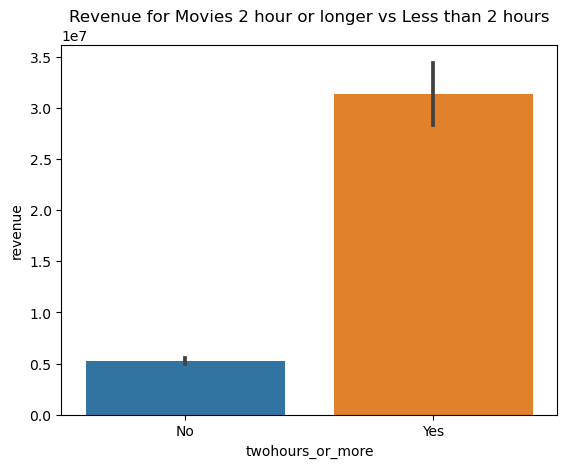

In [34]:
#visualization
ax = sns.barplot(data=df, x='twohours_or_more',y='revenue')
ax.set_title("Revenue for Movies 2 hour or longer vs Less than 2 hours");

From our graph above we can see that movies 2 or more clearly earn more revenue.

In [35]:
#filter out smokers vs non-smokers
two_ormore = df.loc[df['twohours_or_more']=='Yes']
less_two = df.loc[df['twohours_or_more']=='No']

In [36]:
#feature of interest
two_ormore_rev = two_ormore['revenue']
less_two_rev = less_two['revenue']

In [37]:
## Getting means and lenghs
print(f"For Movies 2 hours or more: (n={len(two_ormore_rev)}): Mean={np.mean(two_ormore_rev):.2f}")
print(f"For Movies less than 2 hours: (n={len(less_two_rev)}): Mean={np.mean(less_two_rev):.2f}")

For Movies 2 hours or more: (n=6813): Mean=31447028.87
For Movies less than 2 hours: (n=55007): Mean=5273444.27


### Checking for Outliers

In [38]:
#checking for outliers for movies 2 hours or more
over_two_outliers = abs(stats.zscore(two_ormore_rev))>3
np.sum(over_two_outliers)

129

In [39]:
#checking for outliers for movies less than 2 hours
less_two_outliers = abs(stats.zscore(less_two_rev))>3
np.sum(less_two_outliers)

644

In [40]:
#remove outliers for movies 2 hours or more
#removing the outliers by filtering them out
two_ormore_rev = two_ormore_rev.loc[~over_two_outliers]
len(two_ormore_rev)

6684

In [41]:
#remove outliers for movies less than 2 hours
#removing the outliers by filtering them out
less_two_rev = less_two_rev.loc[~less_two_outliers]
len(less_two_rev)

54363

### Check for normality

In [42]:
# normal test for movies 2 hours or more
result_two_or_more = stats.normaltest(two_ormore_rev)
result_two_or_more

NormaltestResult(statistic=6591.967648606639, pvalue=0.0)

In [43]:
# normal test for movies less than 2 hours
result_less_two = stats.normaltest(less_two_rev)
result_less_two

NormaltestResult(statistic=70498.06963417126, pvalue=0.0)

For both groups p is less than 0.05 so we can assume these are NOT normal distributions, however, since each group has greater than 15 samples we can safely ignore the assumption of normality and proceed.

### checking for equal variance

In [44]:
result = stats.levene(two_ormore_rev, less_two_rev)
result

LeveneResult(statistic=2494.19830988327, pvalue=0.0)

- Since our p-value was less than .05 we reject the null hypothesis that the samples come from populations with equal variances. Since our groups DO NOT have equal variance, in our test we will need to set equal_var =False (default value is True)

### T-test

In [45]:
result = stats.ttest_ind(two_ormore_rev, less_two_rev, equal_var=False)
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


### Conclusion

Based on our t-test (p < 0.05), we have a significant result. In conclusion, we reject the null hypothesis and support the alternative hypothesis that movies that are 2 hours or longer vs less than 2 hours have an impact on the movies earned revenue.

### State the Hypothesis & Null Hypothesis

- $H_0$ Null Hypothesis: Movies that belong to a collection have no impact on the movies revenue.

-  $H_1$ Alternate hypothesis: Movies that belong to a collection have a higher revenue.

- Alpha Level - We are using an alpha level of 0.05.

- Test of Choice: Independent t-test (2-sample)

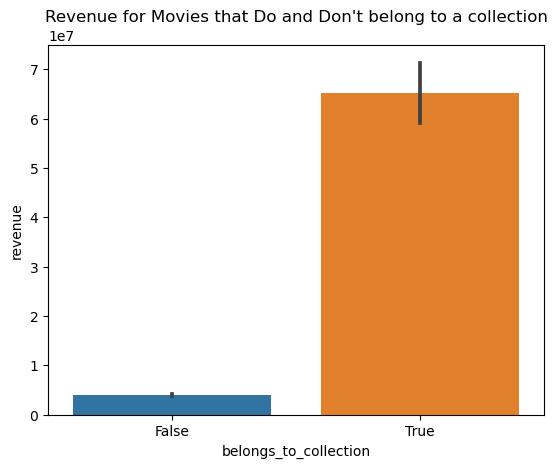

In [46]:
#visualization
ax = sns.barplot(data=df, x='belongs_to_collection',y='revenue')
ax.set_title("Revenue for Movies that Do and Don't belong to a collection");

Our graph is showing that movies that belong to a collection earn more revenue than those that don't.

In [47]:
#filter out movies
belong = df.loc[df['belongs_to_collection']==True]
dont_belong = df.loc[df['belongs_to_collection']==False]

In [48]:
#feature of interest
belong_rev = belong['revenue']
dont_belong_rev = dont_belong['revenue']

In [49]:
## Getting means and lenghs
print(f"For Movies that belong to a collection: (n={len(belong_rev)}): Mean={np.mean(belong_rev):.2f}")
print(f"For Movies that don't belong to a collection: (n={len(dont_belong_rev)}): Mean={np.mean(dont_belong_rev):.2f}")

For Movies that belong to a collection: (n=4207): Mean=65225716.37
For Movies that don't belong to a collection: (n=57613): Mean=3990772.36


### Checking for Outliers

In [50]:
#checking for outliers for movies that belong to collection
belong_outliers = abs(stats.zscore(belong_rev))>3
np.sum(belong_outliers)

117

In [51]:
#checking for outliers for movies that don't belong to collection
dont_belong_outliers = abs(stats.zscore(dont_belong_rev))>3
np.sum(dont_belong_outliers)

741

In [52]:
#removing the outliers by filtering them out
belong_rev = belong_rev.loc[~belong_outliers]
len(belong_rev)

4090

In [53]:
#removing the outliers by filtering them out
dont_belong_rev = dont_belong_rev.loc[~dont_belong_outliers]
len(dont_belong_rev)

56872

### check for normality

In [54]:
# normal test for movies that belong to a collection
result_belong = stats.normaltest(belong_rev)
result_belong

NormaltestResult(statistic=2944.9029280076384, pvalue=0.0)

In [55]:
# normal test for movies that don't belong to a collection
result_dont_belong = stats.normaltest(dont_belong_rev)
result_dont_belong

NormaltestResult(statistic=73697.00370472232, pvalue=0.0)

For both groups p is less than 0.05 so we can assume these are NOT normal distributions, however, since each group has greater than 15 samples we can safely ignore the assumption of normality and proceed.

### check for equal variance

In [56]:
result = stats.levene(belong_rev, dont_belong_rev)
result

LeveneResult(statistic=7045.01278362527, pvalue=0.0)

- Since our p-value was less than .05 we reject the null hypothesis that the samples come from populations with equal variances. Since our groups DO NOT have equal variance, in our test we will need to set equal_var =False (default value is True)

T-test

In [57]:
result = stats.ttest_ind(belong_rev, dont_belong_rev, equal_var=False)
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


### Conclusion

Based on our t-test (p < 0.05), we have a significant result. In conclusion, we reject the null hypothesis and support the alternative hypothesis that movies that belong to a collection have higher revenues.

## Linear Regression Model

In [58]:
## checking for null values
df.isna().sum().sum()

0

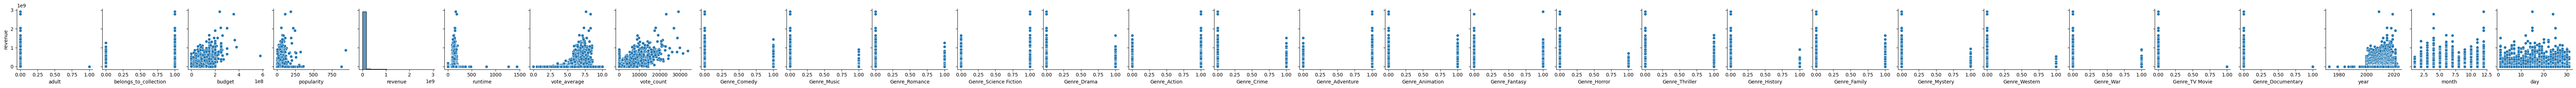

In [59]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='revenue');

### Define X and y variable and Train, Test, Split Data

In [60]:
## Make x and y variables (y=target, X=features)
y = df['revenue'].copy()
X = df.drop(columns=['revenue','imdb_id','title','adult','twohours_or_more']).copy()


In [61]:
#split data into training and testing dataset
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
#view training dataset
X_train.head()

,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
19085,False,0.0,2.120,97.0,5.000,2.0,Unknown,False,False,False,...,False,False,False,False,False,False,False,2010.0,10.0,11.0
36864,False,0.0,0.600,83.0,8.000,1.0,Unknown,False,False,False,...,False,False,False,False,False,False,False,2016.0,12.0,12.0
21960,False,0.0,0.899,80.0,0.000,0.0,G,False,False,False,...,False,True,False,False,False,False,False,2011.0,1.0,1.0
47847,False,0.0,2.597,85.0,5.962,13.0,Unknown,True,False,True,...,False,False,False,False,False,False,False,2018.0,3.0,9.0
9491,False,0.0,1.800,78.0,6.000,2.0,Unknown,True,False,False,...,False,False,False,False,False,False,False,2006.0,8.0,20.0


### Create Preprocessor

In [62]:
## make category selector and use it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
#view list of category columns
cat_cols

['certification']

In [63]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
#view list of numeric columns
num_cols

['budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [64]:
## make bool selector and using it to save list of column names
bool_select = make_column_selector(dtype_include='bool')
bool_cols = bool_select(X_train)
#view list of bool columns
bool_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [65]:
X_train[bool_cols]= X_train[bool_cols].astype(int)
X_test[bool_cols]= X_test[bool_cols].astype(int)

In [66]:
#instantiate preprocessors
cons_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
mean_imputer = SimpleImputer(strategy='mean')

In [67]:
## make pipelines and final preprocessor
cat_pipe = make_pipeline(cons_imputer,ohe)
num_pipe = make_pipeline(mean_imputer)
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), 
                                       ('passthrough', bool_cols), remainder='passthrough')

In [68]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['budget', 'popularity', 'runtime',...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [69]:
## Create the empty list to capture column names for our database
final_features = []

In [70]:
## Using named steps dictionary to find the encoder (display the steps)
preprocessor.named_transformers_['pipeline-1'].named_steps

{'simpleimputer': SimpleImputer(fill_value='Missing', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [71]:
## Using named steps dictionary to find the encoder (slice out encoder and save it to variable)
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']
#display variable
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [72]:
## get OHE feature names by using .get_feature_names_out() method and save to variable
cat_features = ohe_step.get_feature_names_out(cat_cols)
#display feature names
cat_features

array(['certification_G', 'certification_NC-17', 'certification_NR',
       'certification_PG', 'certification_PG-13', 'certification_R',
       'certification_Unknown'], dtype=object)

In [73]:
## Add the categorical feature names to our final_features list using .extend since we're adding 2 lists together
final_features.extend(cat_features)
final_features

['certification_G',
 'certification_NC-17',
 'certification_NR',
 'certification_PG',
 'certification_PG-13',
 'certification_R',
 'certification_Unknown']

In [74]:
## add the numeric feature names to final_features list
final_features.extend(num_cols)
#display final list of column names
final_features

['certification_G',
 'certification_NC-17',
 'certification_NR',
 'certification_PG',
 'certification_PG-13',
 'certification_R',
 'certification_Unknown',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [75]:
## add the bool feature names to final_features list
final_features.extend(bool_cols)
#display final list of column names
final_features

['certification_G',
 'certification_NC-17',
 'certification_NR',
 'certification_PG',
 'certification_PG-13',
 'certification_R',
 'certification_Unknown',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day',
 'belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [76]:
len(final_features)

35

In [77]:
#checking shape matches len of final features
preprocessor.transform(X_train).shape

(46365, 35)

### Transforming X_train and X_test and remaking DataFrames

- "columns = final_features" - adds the column names
- "index = X_train.index" - maintains original index of x_train to match x and y (By default, index would reset with 0)

In [78]:
#Transforming X_train
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
#display new dataframe for X_train
X_train_df.head(2)

,certification_G,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,certification_Unknown,budget,popularity,runtime,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
19085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.12,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36864,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.60,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Transforming X_test
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
#display new dataframe for X_test
X_test_df.head()

,certification_G,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,certification_Unknown,budget,popularity,runtime,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
18738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.903,85.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.216,90.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11620,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.840,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40404,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.600,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50162,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1600000.0,10.470,106.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Adding Constant

In [80]:
## verifying if constant will be added correctly to X_train before overriding dataframes
#prepend=False = adds the contant column to the last column vs the first column
sm.add_constant(X_train_df, prepend=False, has_constant='add').head(2)

,certification_G,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,certification_Unknown,budget,popularity,runtime,...,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
19085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.12,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36864,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.60,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
## Adding constant column to both X_train and X_test dataframes
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
#display head of both dataframes
display(X_train_df.head(2), X_test_df.head(2))

,certification_G,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,certification_Unknown,budget,popularity,runtime,...,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
19085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.12,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36864,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.60,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,certification_G,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,certification_Unknown,budget,popularity,runtime,...,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
18738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.903,85.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.216,90.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Linear Regression Statsmodel

In [82]:
##instantiate model With training dataset
model = sm.OLS(y_train,X_train_df)

#fit the statmsodels OLS and save to variable
result = model.fit()

#display summary of results for training data
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     4108.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        06:08:07   Log-Likelihood:            -8.6550e+05
No. Observations:               46365   AIC:                         1.731e+06
Df Residuals:                   46330   BIC:                         1.731e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G       -1.615e+07    6.6e+06     -2.448      0.014   -2.91e+07   -3.22e+06
certification_NC-17   -1.649e+07   6.88e+06     -2.397      0.017      -3e+07   -3.01e+06
certification_NR      -1.394e+07   6.49e+06     -2.148      0.032   -2.67e+07   -1.22e+06
certification_PG      -1.493e+07   6.47e+06     -2.307      0.021   -2.76e+07   -2.24e+06
certification_PG-13   -2.227e+07   6.44e+06     -3.459      0.001   -3.49e+07   -9.65e+06
certification_R       -2.669e+07   6.41e+06     -4.165      0.000   -3.92e+07   -1.41e+07
certification_Unknown -1.277e+07   6.47e+06     -1.975      0.048   -2.54e+07   -9.46e+04
budget                    1.6204      0.014    119.442      0.000       1.594       1.647
popularity             1.297e+05   1.78e+04      7.276      0.000    9.48e+04    1.65e+05
runtime               -3168.1350   5043.812     -0.628      0.530   -1.31e+04    6717.813
vote_average          -4.821e+05   6.14e+04     -7.857      0.000   -6.02e+05   -3.62e+05
vote_count             2.684e+04    189.411    141.692      0.000    2.65e+04    2.72e+04
year                   6.884e+04   2.55e+04      2.697      0.007    1.88e+04    1.19e+05
month                 -1.051e+05    4.1e+04     -2.564      0.010   -1.85e+05   -2.48e+04
day                    3386.9698   1.58e+04      0.215      0.830   -2.75e+04    3.43e+04
belongs_to_collection  1.113e+07   6.14e+05     18.129      0.000    9.93e+06    1.23e+07
Genre_Comedy          -3.379e+05   3.53e+05     -0.957      0.339   -1.03e+06    3.54e+05
Genre_Music            7.681e+05   1.01e+06      0.763      0.446   -1.21e+06    2.74e+06
Genre_Romance         -2.297e+05   4.45e+05     -0.516      0.606    -1.1e+06    6.42e+05
Genre_Science Fiction -3.963e+06   6.56e+05     -6.041      0.000   -5.25e+06   -2.68e+06
Genre_Drama           -4.308e+05   3.33e+05     -1.293      0.196   -1.08e+06    2.22e+05
Genre_Action           -1.86e+06   4.91e+05     -3.788      0.000   -2.82e+06   -8.97e+05
Genre_Crime           -3.145e+06   5.68e+05     -5.537      0.000   -4.26e+06   -2.03e+06
Genre_Adventure        3.744e+06   7.14e+05      5.246      0.000    2.35e+06    5.14e+06
Genre_Animation         2.99e+06   8.95e+05      3.341      0.001    1.24e+06    4.74e+06
Genre_Fantasy         -2.172e+06   7.15e+05     -3.039      0.002   -3.57e+06   -7.71e+05
Genre_Horror           4.527e+04    4.5e+05      0.101      0.920   -8.36e+05    9.27e+05
Genre_Thriller        -1.213e+06   4.19e+05     -2.897      0.004   -2.03e+06   -3.93e+05
Genre_History         -3.593e+06    9.8e+05     -3.667      0.000   -5.51e+06   -1.67e+06
Genre_Family          -1.079e+06   7.34e+05     -1.471      0.141   -2.52e+06    3.58e+05
Genre_Mystery         -1.844e+06   6.57e+05     -2.807      0.005   -3.13e+06   -5.56e+05
Genre_Western         -

### Evaluating Model on Testing Data

In [83]:
# use the result variable with .predict() to evaluate model on test data
test_preds = result.predict(X_test_df)

In [84]:
#save evaluation scores as variables
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [85]:
#displaying scores
print(f'Testing r-square value: {test_r2}')
print(f'Testing mean squared error: {test_mse}')

Testing r-square value: 0.7440385847915199
Testing mean squared error: 793899871495447.6


### QQ-Plot to Check Normality

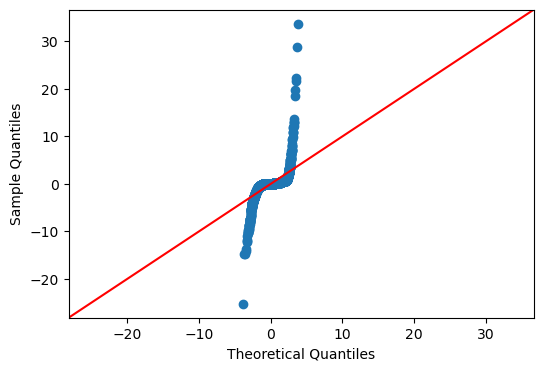

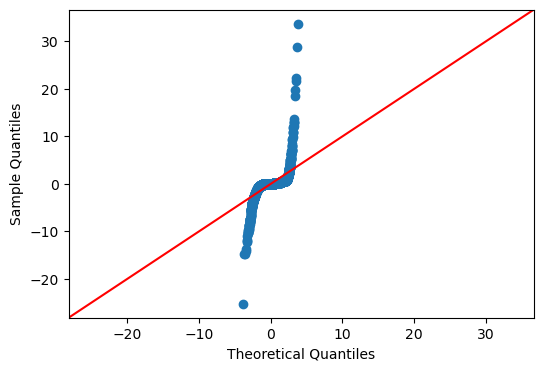

In [86]:
#calculate residuals
resid = y_test - test_preds

#plot them qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True, ax=ax)

### Checking for Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

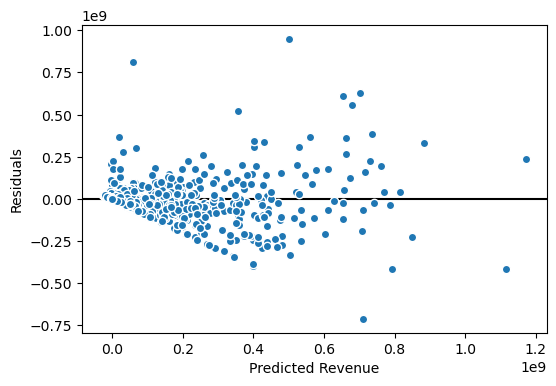

In [87]:
## plot scatterplot for resids vs test_preds
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(test_preds, resid, ec='white')
ax.axhline(0,c='k',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Checking for Linearity

In [88]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='revenue'))
len(cols)

9

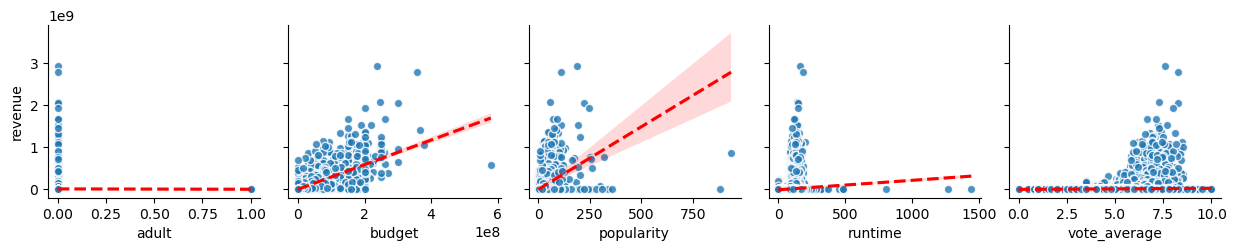

In [90]:
## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='revenue',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

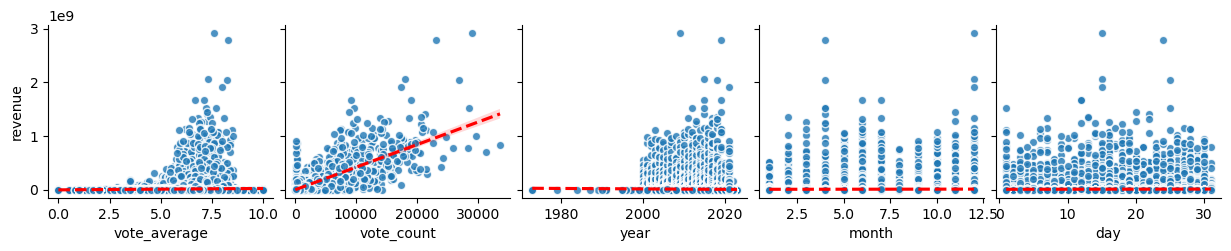

In [92]:
## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='revenue',kind='reg',x_vars=cols[4:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

### checking for multicollinearity

In [94]:
#using absolute value so we can check anything greater than .8
corr = df.drop(columns='revenue').corr().abs()
corr

C:\Users\Daisy\AppData\Local\Temp\ipykernel_9516\172164595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='revenue').corr().abs()


,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,Genre_Comedy,Genre_Music,Genre_Romance,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
adult,1.000000,0.000121,0.007874,0.007937,0.005891,0.019695,0.007616,0.016032,0.003245,0.004724,...,0.006471,0.009834,0.008054,0.003379,0.005269,0.002952,0.001101,0.000910,0.013302,0.003364
belongs_to_collection,0.000121,1.000000,0.220252,0.249632,0.069491,0.124862,0.234397,0.055235,0.001373,0.023252,...,0.013367,0.128063,0.014819,0.011243,0.002639,0.006860,0.017192,0.035095,0.017655,0.024632
budget,0.007874,0.220252,1.000000,0.510980,0.141119,0.131327,0.714410,0.021145,0.002641,0.006552,...,0.040913,0.114444,0.014128,0.017386,0.043582,0.013568,0.015673,0.076154,0.022710,0.025244
popularity,0.007937,0.249632,0.510980,1.000000,0.147081,0.223530,0.587249,0.025198,0.000298,0.020080,...,0.037088,0.080472,0.035759,0.008647,0.027468,0.001770,0.025792,0.007873,0.022527,0.034536
runtime,0.005891,0.069491,0.141119,0.147081,1.000000,0.281316,0.135461,0.026857,0.029385,0.105403,...,0.097235,0.012878,0.029479,0.008017,0.062316,0.018299,0.030029,0.009161,0.052896,0.067073
vote_average,0.019695,0.124862,0.131327,0.223530,0.281316,1.000000,0.156700,0.075981,0.030846,0.092212,...,0.080246,0.073026,0.034909,0.003323,0.052928,0.019338,0.024714,0.024645,0.056493,0.085630
vote_count,0.007616,0.234397,0.714410,0.587249,0.135461,0.156700,1.000000,0.011730,0.001293,0.000239,...,0.019808,0.057130,0.031412,0.010533,0.019748,0.010991,0.015634,0.041825,0.026669,0.025151
Genre_Comedy,0.016032,0.055235,0.021145,0.025198,0.026857,0.075981,0.011730,1.000000,0.026834,0.172695,...,0.072739,0.061167,0.099797,0.027240,0.062934,0.009010,0.021824,0.039861,0.003079,0.012830
Genre_Music,0.003245,0.001373,0.002641,0.000298,0.029385,0.030846,0.001293,0.026834,1.000000,0.040067,...,0.010742,0.017843,0.029408,0.003742,0.004451,0.000543,0.043082,0.009480,0.016024,0.004157
Genre_Romance,0.004724,0.023252,0.006552,0.020080,0.105403,0.092212,0.000239,0.172695,0.040067,1.000000,...,0.015348,0.039880,0.047608,0.021322,0.013225,0.012234,0.029325,0.062390,0.007315,0.015263


### Removing Outliers

In [96]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price

array([[-0.13367116],
       [-0.13367116],
       [-0.13367116],
       ...,
       [-0.13367116],
       [-0.13367116],
       [-0.13367116]])

In [97]:
z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

19085   -0.133671
36864   -0.133671
21960   -0.133671
47847   -0.133671
9491    -0.133671
           ...   
55119   -0.133671
38684   -0.133671
862     -0.133671
16002   -0.133671
57254   -0.133671
Length: 46365, dtype: float64

In [98]:
## saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers

19085    False
36864    False
21960    False
47847    False
9491     False
         ...  
55119    False
38684    False
862      False
16002    False
57254    False
Length: 46365, dtype: bool

In [99]:
## How many outliers did we find?
idx_outliers.sum()

520

In [100]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

In [102]:
print(f"Our model includes movies with revenues of:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes movies with revenues of:
- Greater than $0.00
- Less than $194,168,700.00


In [103]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# how many outleirs in test data?
idx_outliers_test.sum()

159

In [107]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

In [108]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2252.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        07:24:07   Log-Likelihood:            -8.0480e+05
No. Observations:               45845   AIC:                         1.610e+06
Df Residuals:                   45810   BIC:                         1.610e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G        2.269e+

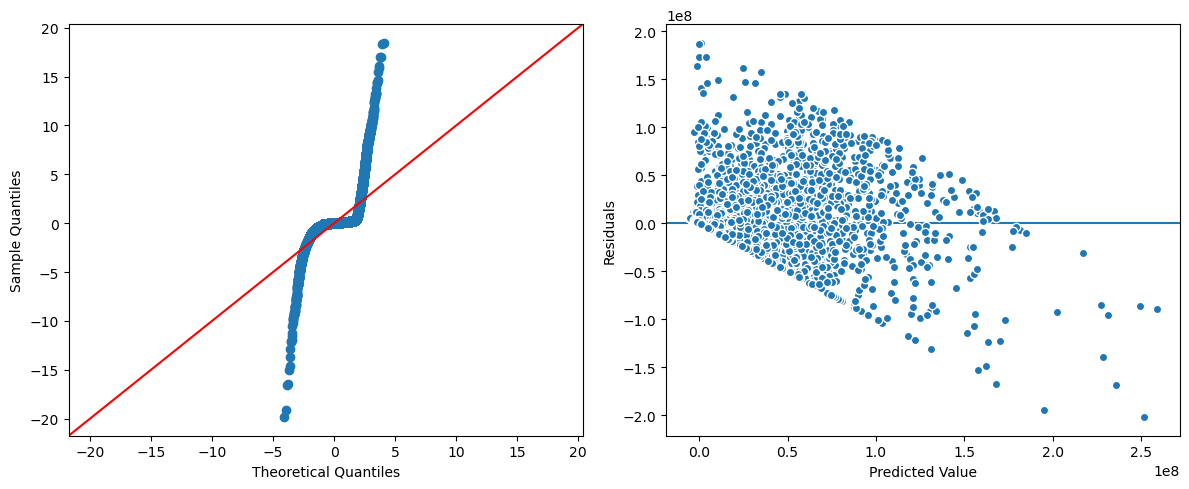

In [109]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

In [110]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]

day                  0.231959
Genre_Music          0.087315
Genre_Romance        0.064235
Genre_Action         0.458415
Genre_Crime          0.258401
Genre_Adventure      0.662441
Genre_Horror         0.190368
Genre_Thriller       0.254255
Genre_History        0.943328
Genre_Mystery        0.304357
Genre_War            0.059184
Genre_TV Movie       0.369979
Genre_Documentary    0.969836
dtype: float64

In [111]:
# use a list comprehension to filter out column sthat start with genre
genre_cols = [col for col in X_train_df.columns if col.startswith('Genre')]
## preview first few zipcode cols to confirm
genre_cols[:3]

['Genre_Comedy', 'Genre_Music', 'Genre_Romance']

In [112]:
len(genre_cols)

19

In [113]:
len(p_vals[p_vals>.05])

13

R-Squared for Test Data: 0.56


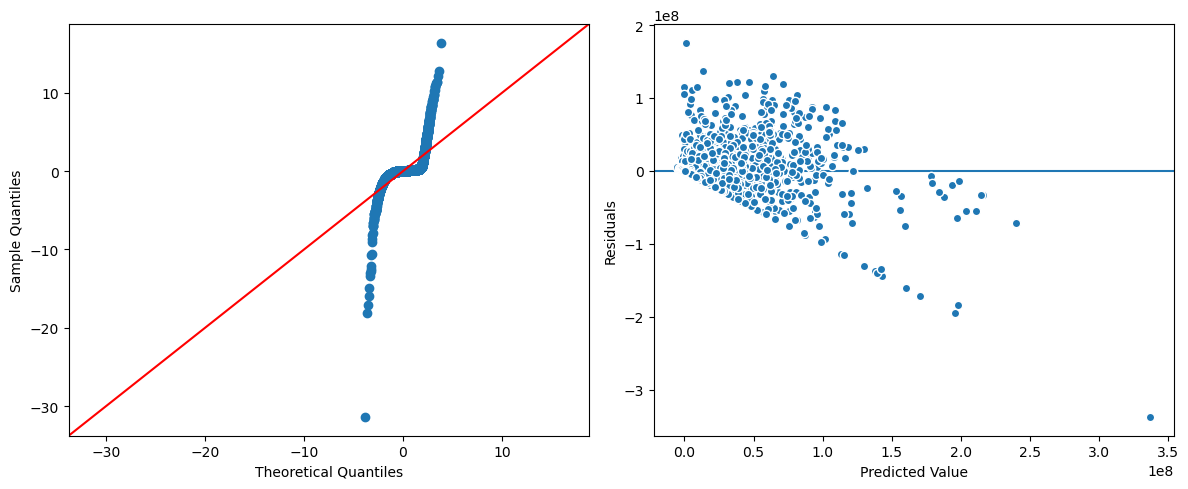

In [114]:
## evaluate test
r2_test = r2_score(y_test_cln, result.predict(X_test_cln))
print(f"R-Squared for Test Data: {r2_test:.2f}")
evaluate_ols(result,X_test_cln, y_test_cln)